In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#raw_data = pd.read_csv("mnist_train.csv") 

In [3]:
raw_data = pd.read_csv('mnist_train.csv', index_col=None, header=None)
raw_data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
pd_data = raw_data[0:2000]
mnist_label = pd_data.iloc[:,0].to_numpy()
pd_mnist_data = pd_data.drop(pd_data.columns[[0]], axis=1)
pd_mnist_data.head(3)

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


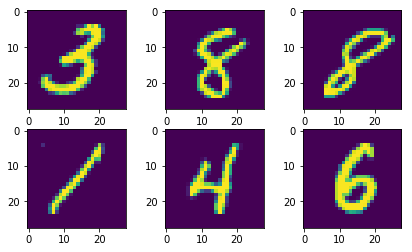

In [92]:
def DisplayMnistData(data, rows, cols, rand=False):
    fig=plt.figure(figsize=(7, 4))
    if (rand):
        sample_indexs = np.random.randint(0, data.shape[0], rows*cols+1) 
    else:
        sample_indexs = list(range(0, rows*cols+1))
        
    for i in range(1, cols*rows +1):
        pixels = data[sample_indexs[i],:].reshape((28, 28))
        fig.add_subplot(rows, cols, i)
        plt.imshow(pixels)
    plt.show()

mnist_data = pd_mnist_data.to_numpy()
DisplayMnistData(mnist_data, 2, 3, rand=True)
    

In [84]:
#compute mean of each row
def PreProcessAndComputeCumvalue(data):   
    data = data.T / 255

    u_data = np.mean(data, axis=1)
    u_data = np.resize(u_data, (data.shape[0], 1))
    data = data - u_data

    eigenvalues, eigenvectors = np.linalg.eig(np.dot(data, data.T))
    eigenvalues = np.resize(eigenvalues, u_data.shape)

    value = np.sum(np.abs(eigenvalues)**2,axis=-1)**(1./2)
    value = np.reshape(value, u_data.shape)
    cum_value = np.cumsum(value) 
    cum_value = cum_value / cum_value[-1]
    
    return data, np.real(eigenvectors), u_data, cum_value

def PCA(data, p_value=100):
    #preprocess data
    shifted_data, eigenvectors, u_data, cum_value = PreProcessAndComputeCumvalue(data)
    
    #PCA
    P = eigenvectors[:, 0:p_value]
    Y = shifted_data.T.dot(P)
    recovered_data = Y.dot(P.T) + u_data.T
    recovered_data = recovered_data * 255
    
    return recovered_data, cum_value

def DisplayCumVAlue(cum_value):
    plt.plot(cum_value)
    plt.show()
    
def GetError(original_data, recovered_data):
    return np.linalg.norm(original_data - recovered_data)
    

P=50


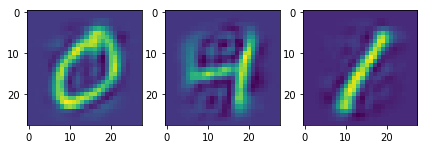

Error= 33514.70326357654 

P=250


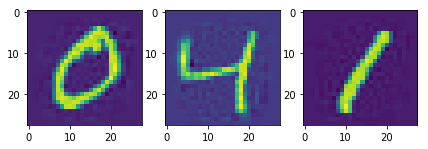

Error= 10902.480104901553 

P=500


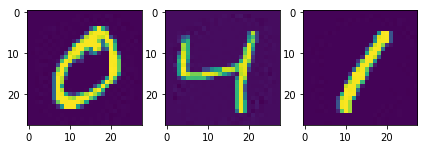

Error= 1611.3860397876679 



In [103]:
mnist_data = pd_mnist_data.to_numpy()

print("P=50")
processed_mnist_data, cum_value = PCA(mnist_data, 50)
DisplayMnistData(processed_mnist_data, 1, 3)
error = GetError(mnist_data, processed_mnist_data)
print("Error=", error, "\n")

print("P=250")
processed_mnist_data, cum_value = PCA(mnist_data, 250)
DisplayMnistData(processed_mnist_data, 1, 3)
error = GetError(mnist_data, processed_mnist_data)
print("Error=", error, "\n")

print("P=500")
processed_mnist_data, cum_value = PCA(mnist_data, 500)
DisplayMnistData(processed_mnist_data, 1, 3)
error = GetError(mnist_data, processed_mnist_data)
print("Error=", error, "\n")



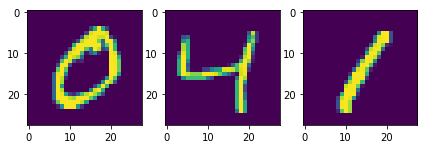

sigma=0.15


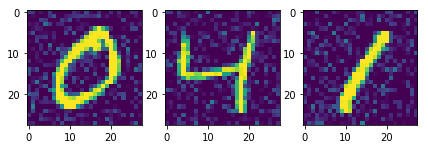

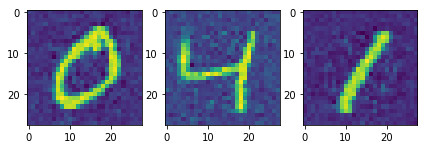



sigma=0.25


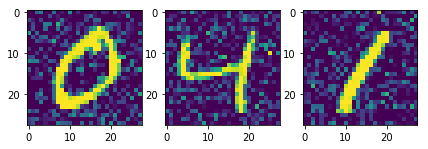

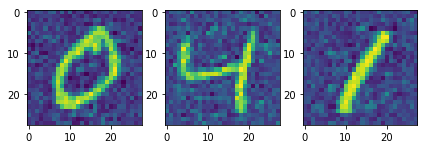



sigma=0.5


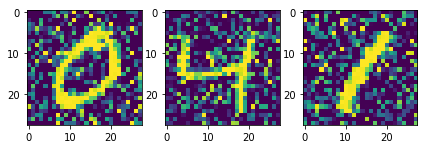

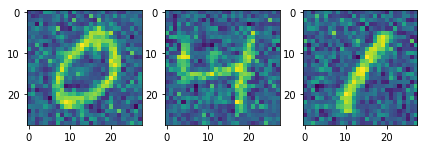

In [106]:
def AddNoiseToDAta(data, mu=0.0, sigma=0.25):
    noise = np.random.normal(mu, sigma, data.shape)
    
    noise[noise < 0] = 0
    data = data + noise * 255
    data[data > 255] = 255

    return data


mnist_data = pd_mnist_data.to_numpy()
DisplayMnistData(mnist_data, 1, 3)

print("sigma=0.15")
corrupted_mnist_data = AddNoiseToDAta(mnist_data, mu=0.0, sigma=0.15)
processed_corrupted_mnist_data, _ = PCA(corrupted_mnist_data, 250)
DisplayMnistData(corrupted_mnist_data, 1, 3)
DisplayMnistData(processed_corrupted_mnist_data, 1, 3)

print("\n\nsigma=0.25")
corrupted_mnist_data = AddNoiseToDAta(mnist_data, mu=0.0, sigma=0.25)
processed_corrupted_mnist_data, _ = PCA(corrupted_mnist_data, 250)
DisplayMnistData(corrupted_mnist_data, 1, 3)
DisplayMnistData(processed_corrupted_mnist_data, 1, 3)

print("\n\nsigma=0.5")
corrupted_mnist_data = AddNoiseToDAta(mnist_data, mu=0.0, sigma=0.5)
processed_corrupted_mnist_data, _ = PCA(corrupted_mnist_data, 250)
DisplayMnistData(corrupted_mnist_data, 1, 3)
DisplayMnistData(processed_corrupted_mnist_data, 1, 3)


